<center>
<img src="logo.png" height="900"> 
</center>


# Контрольная работа :)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot') # стиль для графиков
%matplotlib inline

В файле `cr.csv` лежат результаты контрольной работы, которая проводилась в Вышке на факультете "Э".  По мнению студентов эти оценки смещённые, несостоятельные и ужасно неэффективные. Но это уже совершенно другая история. Подгрузим файлик и посмотрим на него!  

In [83]:
df = pd.read_csv('cr.csv', sep='\t')
print(df.shape)
df.head()

(389, 20)


,contest_login,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,k2b,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3
0,eds_python_2020_1,0.0,10.0,10.0,20.0,30.0,4.0,22.0,10.1,20.0,10.0,20.0,20.0,20.0,20.0,11.0,35.0,0.0,27.0,6.2
1,eds_python_2020_2,1.0,9.0,10.0,20.0,NaN,16.0,12.0,6.7,NaN,5.0,NaN,20.0,20.0,20.0,6.5,35.0,29.0,22.0,8.6
2,eds_python_2020_3,0.0,2.0,10.0,20.0,NaN,20.0,30.0,8.2,20.0,5.0,NaN,20.0,20.0,20.0,8.5,28.0,2.0,0.0,3.0
3,eds_python_2020_4,1.0,10.0,10.0,20.0,NaN,16.0,14.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,30.0,38.0,0.0,6.8
4,eds_python_2020_5,2.0,10.0,10.0,12.0,0.0,16.0,22.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,0.0,0.0,0.0,0.0


__Описание колонок:__


* `contest_login` - уникальный идентификатор студента
* `fraud` - в списывании скольки задач был уличён студент 
* `k1` - результат за первую контрольную, `k1a - k1f` в разбивке по задачам
* `k2` - результат за вторую контрольную, `k2a - k2f` в разбивке по задачам
* `k3` - результат за третью контрольную, `k3a - k3с` в разбивке по задачам

__а) Распределение результатов контрольной__ 

- Запишите все оценки за первую контрольную в переменную `x`, все пропуски удалите
- Найдите среднее и стандартное отклонение (используйте несмещённую оценку) 
- Постройте гистограмму результатов за первую контрольную 
- На этой же картинке постройте плотность нормального распределения со средним и стандартным отклонением, посчитанными выше

Похоже ли эмпирическое распределение на нормальное? 

In [6]:
df['k1']

0      10.1
1       6.7
2       8.2
3       7.0
4       7.0
       ... 
384     1.0
385     0.4
386     6.2
387     0.0
388     6.9
Name: k1, Length: 389, dtype: float64

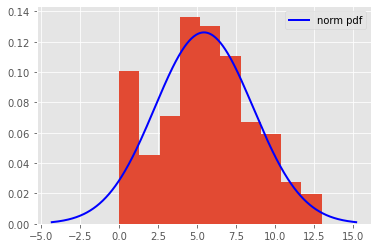

In [79]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

x = df['k1']

x_mean = x.mean()
x_std = x.std(ddof=1)

# your code here

fig, ax = plt.subplots()
x.hist(ax=ax, density=True)
dist = stats.norm(loc=x_mean, scale=x_std)
x_t = np.linspace(dist.ppf(0.001),
                dist.ppf(0.999), len(x))
ax.plot(x_t, dist.pdf(x_t),
       'b', lw=2, alpha=1, label='norm pdf')
plt.legend()

In [23]:
# проверка, что среднее и стандартное откланение посчитаны корректно
assert np.abs(x_mean - 5.4478149100) < 1e-5

# похожие тесты на другие части задания скрыты от вас


По аналогии с тем, как это было сделано на лекции, проверьте с помощью теста Колмогорова-Смирнова гипотезу о нормальности: 

- Используйте функцию `kstest` из пакета `scipy`
- С помощью `.pvalue` вытащите из результатов теста p-значение, запишите его в переменную `pvalue`
- По аналогии запишите в `K` значение статистики Колмогорова
- Если p-значение оказалось больше $0.05$, гипотеза о нормальности данных не отвергается, и мы можем дальше использовать эту предпосылку

In [80]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
test = stats.kstest(x, 'norm', args=(x_mean, x_std))
pvalue = test.pvalue
K = test.statistic

# your code here


In [82]:
# проверка, что pvalue найдено корректно
assert np.abs(K - 0.051247) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Предположим невероятное! А именно, независимость и одинаковую распределённость наших наблюдений (никто не списывал контрольную друг у друга).

__б) Интервал для среднего.__ 

Постройте точный $95\%$-й доверительный интервал для ожидамоего результата за первую контрольную. В качестве оценки стандартного отклонения используйте несмещённый вариант, `ddof=1`. В переменные `left` и `right` запишите границы получившегося интервала. В переменную `delta` его ширину. 

In [90]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

alpha = 0.05
q = stats.t.ppf(1-alpha/2, df=len(x)-1)

left = x_mean - q * x_std / np.sqrt(len(x))
right = x_mean + q * x_std / np.sqrt(len(x))
delta = right - left

# your code here


In [91]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 5.13247213744281) < 1e-5

# похожие тесты на другие части задания скрыты от вас


In [92]:
left, right

(5.13247213744281, 5.76315768260861)

__в) Ангелы и демоны__

Переменная`fraud` - в списывании скольки задач был уличён студент. Разобьём наши наблюдения на две группы: Ангелы и Демоны. У Ангелов `fraud == 0`, у Демонов `fraud > 0`. 

Запишите оценки за первую контрольную для ангелов в переменную `angels`, для демонов в `demons`. Все пропуски из выборки удалите. Постройте на общем фоне гистограмму распределения оценок за первую контрольную у Ангелов и Демонов. 

In [98]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

angels = df[df['fraud'] == 0]['k1']
demons = df[df['fraud'] > 0]['k1']

# your code here


In [99]:
# проверка того, сколько в выборке оказалось ангелов и демонов
assert len(angels) == 109

# похожие тесты на другие части задания скрыты от вас


__г) Интервал для разницы средних__ 

Постройте примерный $95\%$-й доверительный интервал для разницы ожидаемого результата за первую контрольную у Ангелов и Демонов без предположения о равенстве дисперсий (интервал Уэлча). Для оценки всех дисперсий используйте несмещённый вариант. Заполните все переменные, перечисленные ниже. 

In [101]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

nu =  (angels.var(ddof=1)/len(angels) + demons.var(ddof=1)/len(demons))**2 / \
(angels.var(ddof=1)**2/(len(angels)**2 * (len(angels)-1)) + (demons.var(ddof=1)**2/(len(demons)**2 * (len(demons)-1))))
# число степеней свободы в распределении Стьюдента
q = stats.t.ppf(1-alpha/2, df=nu)

left = angels.mean() - demons.mean() - q * np.sqrt(angels.var(ddof=1)/len(angels) + demons.var(ddof=1)/len(demons))
# левая граница интервала
right = angels.mean() - demons.mean() + q * np.sqrt(angels.var(ddof=1)/len(angels) + demons.var(ddof=1)/len(demons))
# правая граница интервала
delta = right - left     # ширина интервала

# your code here


In [102]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.8045581262764373) < 1e-5

# похожие тесты на другие части задания скрыты от вас


In [103]:
left, right

(-0.8045581262764373, 0.5469728051755148)

Входит ли в получившийся доверительный интервал ноль? Как думаете, что это означает? 

__д) Интервал для дисперсии__ 

Предположим, что математическое ожидание результата за контрольную зависит от уровня подготовки, а дисперсия результата — от нервов. Постройте для отношения нервозности Демонов и Ангелов $95\%$ доверительный интервал. Для оценки всех дисперсий используйте несмещённый вариант. 

In [111]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
angels_var = angels.var(ddof=1)
demons_var = demons.var(ddof=1)

rel = demons_var / angels_var

alpha = 0.05
left = rel * stats.f.ppf(alpha/2, dfn=len(angels)-1, dfd=len(demons)-1)
# левая граница интервала
right = rel * stats.f.ppf(1-alpha/2, dfn=len(angels)-1, dfd=len(demons)-1)
# правая граница интервала
delta = right - left
# ширина интервала

# your code here


In [112]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 0.6120428247687726) < 1e-5

# похожие тесты на другие части задания скрыты от вас


In [113]:
left, right

(0.6120428247687726, 1.1623835577954722)

Вошла ли в доверительный интервал единица? Как думаете, что это означает? 

__е) Ангелы и демоны решают задачки__ 

Нарисуйте картинку для корреляционной матрицы по задачам первой контрольной для всех наблюдений, отдельно для Ангелов и Демонов. Пропуски заполните нулями. Будем считать, что если у студента нет оценки, он не выполнял это задание. Для подсчёта корреляций используйте метод `.corr`. Для отрисовки матриц функцию `heatmap` из пакета `seaborn`. Для ангелов неплохо подойдёт цветовая схема `YlGnBu`. Для демонов подходит схема `gist_heat_r`.

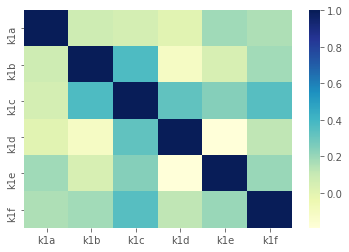

In [119]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

tasks = ['k1a', 'k1b', 'k1c', 'k1d', 'k1e', 'k1f']

# your code here
sns.heatmap(df.loc[angels.index, 'k1a':'k1f'].corr(), cmap='YlGnBu')

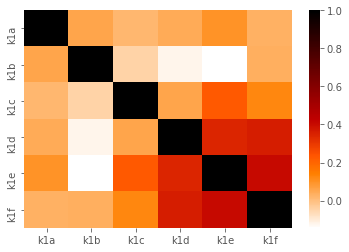

In [121]:
sns.heatmap(df.loc[demons.index, 'k1a':'k1f'].corr(), cmap='gist_heat_r')

Между баллом за какие задачи самая высокая корреляция у Ангелов? В грейдер отправьте название колонок в порядке возрастания через запятую. __Например:__ `("k1a", "k1f")`. 

In [123]:
df.loc[demons.index, 'k1a':'k1f'].corr()

,k1a,k1b,k1c,k1d,k1e,k1f
k1a,1.000000,0.058300,0.021537,0.047128,0.099610,0.035243
k1b,0.058300,1.000000,-0.042318,-0.118256,-0.143139,0.038174
k1c,0.021537,-0.042318,1.000000,0.058288,0.230635,0.127674
k1d,0.047128,-0.118256,0.058288,1.000000,0.345341,0.361724
k1e,0.099610,-0.143139,0.230635,0.345341,1.000000,0.406881
k1f,0.035243,0.038174,0.127674,0.361724,0.406881,1.000000


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

names_angels = ("k1b", "k1c")
names_demons = ("k1e", "k1f")

# your code here


In [ ]:
# проверка вашего ответа скрыта от вас

Как думаете, какие задачи было тяжелее всего списать? 

__ё) Доля написавших третью контрольную.__

Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

У студентов был выбор: писать или не писать третью контрольную. Если в колонке `k3` стоит $0$, значит студент не стал это делать. Постройте асимптотический $95\%$-й доверительный интервал для разницы долей Ангелов и Демонов, которые решили писать третью контрольную. 

__Примечание:__ На практике, если мы пользуемся асимптотическими доверительными интервалами, мы можем искать границы двумя способами:

* __Первый__ состоит в том, что мы оцениваем стандартное отклонение с помощью $\sqrt{\hat{p} \cdot (1 - \hat{p})} = \sqrt{\frac{1}{n} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$. 
* __Второй способ__ состоит в том, чтобы оценить стандартное отклонение как  $\sqrt{\frac{1}{n-1} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$. 

В плане асимптотики это не влияет на выводы, так как обе этих оценки состоятельно оценивают дисперсию. Можно пользоваться любым. Однако, чтобы с грейдером не было проблем и задание зачлось, воспользуйтесь первым способом. 

In [158]:
(df.loc[angels.index, 'k3'] != 0).mean()

0.5504587155963303

In [178]:
(df.loc[angels.index, 'k3'] != 0).var(ddof=0)

0.2474539180203687

In [159]:
(df.loc[demons.index, 'k3'] != 0).mean()

0.628

In [188]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

mean_angels = (df.loc[angels.index, 'k3'] != 0).mean()
mean_demons = (df.loc[demons.index, 'k3'] != 0).mean()

var_angels = (df.loc[angels.index, 'k3'] != 0).var(ddof=0)
var_demons = (df.loc[demons.index, 'k3'] != 0).var(ddof=0)

alpha = 0.05
q = stats.norm.ppf(1-alpha/2)

std_k3 = np.sqrt(var_angels/(len(angels)) + var_demons/(len(demons)))
left = mean_angels - mean_demons - q * std_k3
# левая граница интервала
right = mean_angels - mean_demons + q * std_k3
# правая граница интервала
delta = right - left
# ширина интервала

# your code here


In [189]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.1885) < 1e-3

# похожие тесты на другие части задания скрыты от вас


In [190]:
left, right

(-0.18849469550492973, 0.03341212669759033)

Входит ли в доверительный интервал ноль? Как думаете, что это означает? 

__ж) Снова разница средних__ 

Посмотрим на результаты студентов в динамике. Постройте точный $95\%$ доверительный интервал для средней разницы оценок за первую и вторую контрольные. Пропуски в данных заполните нулями. 

In [192]:
x_1 = df['k1'].fillna(0)
x_2 = df['k2'].fillna(0)

In [212]:
diff = x_2 - x_1

In [213]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

alpha = 0.05

q = stats.t.ppf(1-alpha/2, df=len(diff)-1)

left = diff.mean() - q * diff.std(ddof=1)/np.sqrt(len(diff))
# левая граница интервала
right = diff.mean() + q * diff.std(ddof=1)/np.sqrt(len(diff))
# правая граница интервала
delta = right - left     # ширина интервала

# your code here


In [214]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 1.4562881732820103) < 1e-5

# похожие тесты на другие части задания скрыты от вас


In [215]:
left, right

(-1.4562881732820103, -0.7072079706768579)

Входит ли в доверительный интервал ноль? Как думаете, что это означает? 

Это домашка подошла к концу. Поздравляю! Теперь вы умеете строить точные доверительные интервалы для нормальных выборок.